In [91]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

In [92]:
jsons_folder = 'jsons'
df = pd.DataFrame(columns=['hash', 'detection'])

def get_scan_result(scans):
    for scan in scans.values():
        if 'result' in scan and scan['result']:
            res = str(scan['result'])
            for s in ['Spy', 'spy']:
                if s in res:
                    return 'spyware'
            for s in ['Ransom', 'ransom']:
                if s in res:
                    return 'ransomware'
            for s in ['Adware', 'adware']:
                if s in res:
                    return 'adware'
            for s in ['Expl', 'expl']:
                if s in res:
                    return 'exploit'
            for s in ['Root', 'root']:
                if s in res:
                    return 'rootkit'
            for s in ['Hack', 'hack']:
                if s in res:
                    return 'hacktool'
            for s in ['trj', 'Trj', 'Troj', 'troj']:
                if s in res:
                    return 'trojan'
    return 'other'

for filename in os.listdir(jsons_folder):
    filepath = os.path.join(jsons_folder, filename)
    with open(filepath, 'r') as f:
        data = json.load(f)
    if 'virustotal' in data and 'scans' in data['virustotal']:
        scanRes = get_scan_result(data['virustotal']['scans'])
    df = pd.concat([df, pd.DataFrame({'hash': [filename.replace('.json', '')], 'detection': [str(scanRes)]})], ignore_index=True)
        
df
            


,hash,detection
0,bf1f5da5f5a9b4feba6602a2dbe1c14a6f89bc6c752be9...,trojan
1,bb0c44eb19af35ed4a0a2d038ee6adad5a5677a1c43666...,other
2,ba100bbf2bb7db432a99f2f7de4001ab0a839ac022e3cd...,trojan
3,bb902b9ead0cae348608ab7c4d0e5dcc,trojan
4,d23276d5ec45b5718e22fa43c62892ec,trojan
...,...,...
3870,baeedb1640944fce2f8dd137e2b2ec1ebaa87ea9ccea2d...,trojan
3871,3a02b01714b08aff6e20e15964390937,trojan
3872,bbe038513f7194f675485294a877d2898e7b75b5257d18...,trojan
3873,927326b6057c46aee021e403d3eaea7b,trojan


In [93]:
df['detection'].value_counts()

detection
trojan        3182
adware         325
other          245
spyware         67
exploit         34
rootkit         11
hacktool         8
ransomware       3
Name: count, dtype: int64

In [94]:
df.to_csv('labeled_data.csv', index=False)
print("Data exported to 'labeled_data.csv'")


Data exported to 'labeled_data.csv'


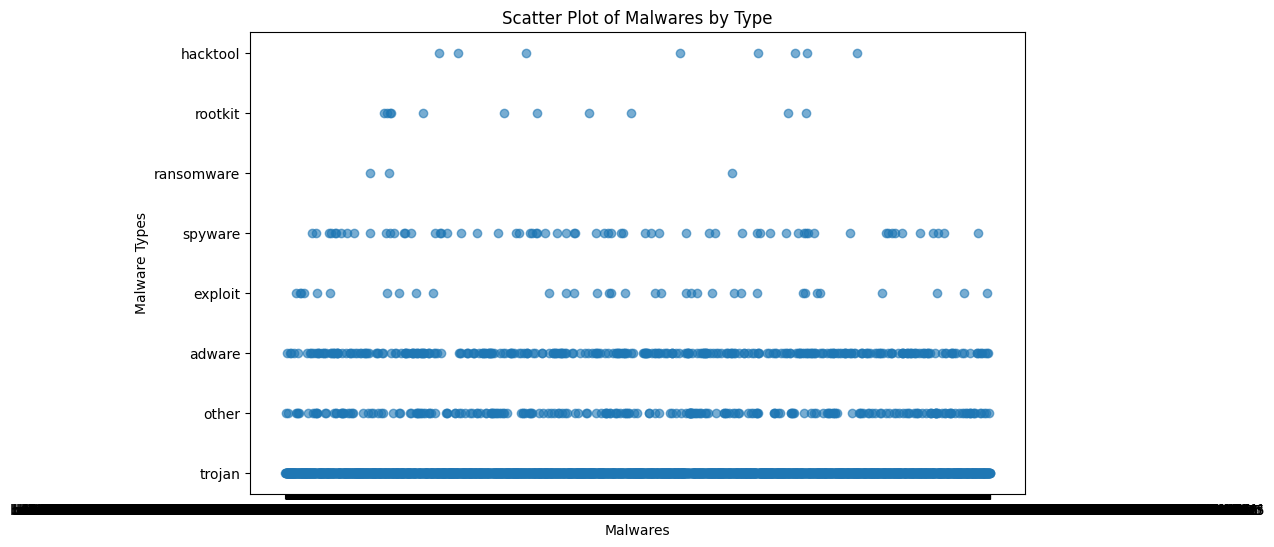

In [95]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['hash'], df['detection'], alpha=0.6)

# Add labels and title
plt.xlabel('Malwares')
plt.ylabel('Malware Types')
plt.title('Scatter Plot of Malwares by Type')

# Show the plot
plt.show()
